In [9]:
import pandas as pd

In [10]:
df = pd.read_csv("subtitle_dataset.csv")

In [11]:
df = df.drop(
    [
        "production_region",
        "corpus",
        "directors",
        "writers",
        "originalTitle",
        "startYear",
        "endYear",
        "Unnamed: 0",
        "filename",
    ],
    axis=1,
)
df = df.dropna()
df = df.drop_duplicates(subset=["IMDB_ID"])
df = df.query("year != 1191")
df = df.query(
    'titleType == "movie" or titleType == "tvEpisode" or titleType =="tvMovie"'
)

In [12]:
mask = df.titleType == "tvMovie"
df.titleType.mask(mask, "movie", inplace=True)

In [14]:
df.genre = df.genre.apply(
    lambda entry: [label for label in entry.split(",") if label != "Drama"]
)

In [15]:
from string import punctuation


def restore_punctuation(text):
    puncutation_marks = set(punctuation)
    new_seq = [" ", " "]
    for char in text:
        if (
            char in puncutation_marks
            and new_seq[-1].isspace()
            and new_seq[-2] not in puncutation_marks
        ):
            new_seq[-1] = char
        else:
            new_seq.append(char)
    new_text = "".join(new_seq).strip()
    new_text = new_text.replace("( ", "(")
    new_text = new_text.replace("'", "'")
    return new_text

In [16]:
df.text = df.text.apply(restore_punctuation)

In [17]:
print(df.text.iloc[1][:2000])

Walt Disney präsentiert aus dem Frontier-Land: ZORRO DER BANDIT In den Hauptrollen: GUY WILLIAMS und GILBERT ROLAND Als Fremder in Kalifornien habt Ihr das Recht, ein Mal verwarnt zu werden. Was ich hiermit tue. Und jetzt nimm deine Männer und verschwinde aus Kalifornien, Cuchillo. Also dann, Zorro! Und nun kommt Ihr Disneyland-Gastgeber Walt Disney. Die meisten von uns verbinden die frühen Tage von Kalifornien mit der Zeit, als es als Republik unter dieser Flagge stand, bevor es 1850 Teil der USA wurde. Und mit Sutter' s Mill in der Nähe von Sacramento, wo 1849 Gold gefunden wurde. Aber noch ein halbes Jahrhundert vor der aufregenden Zeit des Goldrausches war Kalifornien das sonnige Land der spanischen Dons. Es war eine romantische Zeit des geruhsamen und vornehmen Lebens, aber auch der Gesetzlosigkeit. Eine Zeit, in der Kaliforniens Isolation von Recht und Ordnung im Rest der Welt eine offene Einladung an Gewaltverbrecher und Banditen war. Es gibt aber auch Geschichten über einen leg

In [18]:
df.shape

(15613, 11)

In [19]:
df.head()

,text,IMDB_ID,genre,year,duration,titleType,primaryTitle,isAdult,runtimeMinutes,averageRating,numVotes
16,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"[Adventure, History]",1943.0,90.0,movie,The Count of Monte Cristo - Part 2: Retribution,0.0,90.0,7.0,80.0
17,Walt Disney präsentiert aus dem Frontier-Land:...,tt1041393,"[Action, Adventure, Comedy]",1960.0,51.0,tvEpisode,El Bandido,0.0,51.0,7.7,26.0
19,Walt Disney präsentiert aus dem Frontier-Land:...,tt1041444,"[Action, Adventure, Comedy]",1960.0,49.0,tvEpisode,"Adios, El Cuchillo",0.0,49.0,7.5,26.0
21,Gaslicht(1960) dTV- Bayerisches FS- 26. August...,tt1213061,[Thriller],1960.0,90.0,movie,Gaslicht,0.0,90.0,8.2,30.0
23,Walt Disney präsentiert aus dem Frontier-Land:...,tt1041392,"[Action, Adventure, Comedy]",1961.0,49.0,tvEpisode,Auld Acquaintance,0.0,49.0,7.7,31.0


In [20]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.15, random_state=42)
df_train, df_val = train_test_split(df, test_size=0.05, random_state=42)

In [21]:
df_train.shape, df_val.shape, df_test.shape

((14832, 11), (781, 11), (2342, 11))

In [22]:
df.to_json("imdb.json", orient="records")
df_train.to_json("imdb_train.json", orient="records")
df_val.to_json("imdb_val.json", orient="records")
df_test.to_json("imdb_test.json", orient="records")

<AxesSubplot:>

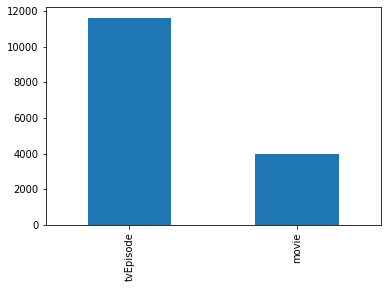

In [23]:
df.titleType.value_counts().plot.bar()

In [24]:
from collections import Counter

genres = []
for entry in df.genre:
    genres.extend(entry)
genre_count = Counter(genres)
genre_count = dict(sorted(genre_count.items(), key=lambda x: x[1], reverse=True))

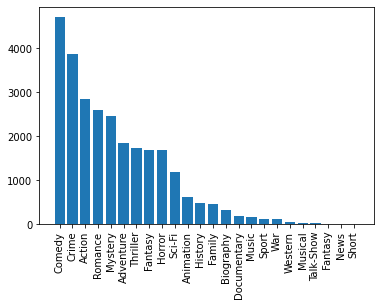

In [25]:
import matplotlib.pyplot as plt

plt.bar(genre_count.keys(), genre_count.values())
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:xlabel='averageRating', ylabel='numVotes'>

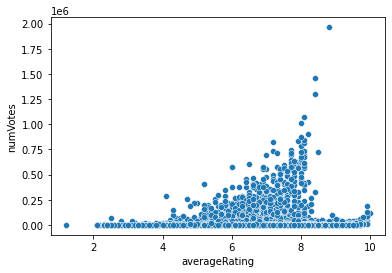

In [26]:
import seaborn as sns

sns.scatterplot(y="numVotes", x="averageRating", data=df)

<AxesSubplot:xlabel='titleType', ylabel='averageRating'>

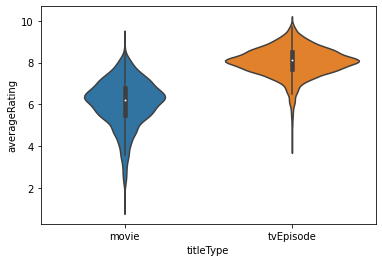

In [27]:
import numpy as np

sns.violinplot(x="titleType", y="averageRating", data=df)
# sns.stripplot(x="titleType", y="averageRating", data=df, color=".3")

<AxesSubplot:xlabel='titleType', ylabel='numVotes'>

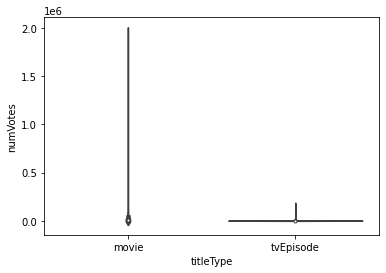

In [28]:
sns.violinplot(x="titleType", y="numVotes", data=df)

In [33]:
df.genre.apply(lambda x: ", ".join(x)).value_counts()

Comedy                      1408
Comedy, Romance             1204
Crime, Mystery              1142
                            1082
Fantasy, Horror              626
                            ... 
Animation, Thriller            1
Comedy, Romance, Sci-Fi        1
Comedy, Musical, Romance       1
Biography, Comedy, Crime       1
Documentary, Short             1
Name: genre, Length: 305, dtype: int64